# Pressure Broadening

pyROX can handle several descriptions of the pressure broadening. In this notebook, we'll explore three approaches: reading broadening coefficients from files, using constant values, and using a parameterisation for the coefficients. 

In [1]:
from pyROX import utils, cross_sections

## Coefficients from a file

In the [\"Getting Started\"](pressure_broadening.ipynb) notebook, we already saw an example of reading broadening coefficients from a file. For AlH, ExoMol provides coefficients for the so-called \"m0\" broadening diet (see [Tennyson et al. 2024](https://ui.adsabs.harvard.edu/abs/2024JQSRT.32609083T/abstract)), which is taken into account by pyROX. This means that $\gamma$ and $n$ are dependent on the (rotational) quantum numbers, resulting in transition-specific broadening coefficients. 

<div class="alert alert-info">
    **Note**
    <p>pyROX currently supports the "a0" and "m0" broadening diets. For other diets, pyROX uses the average broadening coefficient in the files.</p>
</div>

In the next cell, we'll load the [AlH example configuration](https://github.com/samderegt/pyROX/blob/main/examples/exomol_alh/exomol_alh.py) and modify the PT-grid, `perturber_info`. Finally, the cross-sections output will be stored in the `broadening_from_file` sub-directory.

In [2]:
import examples.exomol_alh.exomol_alh as config

# Configure the PT-grid for this notebook
import numpy as np
P_grid = 10**np.array([0.,1.,2.]) # [bar]
T_grid = np.array([2000]) # [K]

# Set the broadening parameters
perturber_info = dict(
    H2 = dict(VMR=0.85, file=f'{config.input_data_dir}/27Al-1H__H2.broad'), # Read from file
    He = dict(VMR=0.15, file=f'{config.input_data_dir}/27Al-1H__He.broad'), 
)

# Change the output directory
output_data_dir = './examples/exomol_alh/broadening_from_file/'

# Update the configuration object
config = utils.update_config_with_args(    
    config=config, 
    output_data_dir=output_data_dir, 
    P_grid=P_grid, 
    T_grid=T_grid, 
    perturber_info=perturber_info,
)

# Load the data object and calculate the opacity cross-sections
data_broadening_from_file = cross_sections.load_data_object(config, download=True)
data_broadening_from_file.calculate_temporary_outputs(progress_bar=True)
data_broadening_from_file.save_combined_outputs()


Updating configuration with new parameters
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "output_data_dir" from ./examples/exomol_alh/ to "./examples/exomol_alh/broadening_from_file/".
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "P_grid" from [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] to [  1.  10. 100.].
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "T_grid" from [1000 2000] to [2000].
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "perturber_info" from {'H2': {'VMR': 0.85, 'file': './examples/exomol_alh/input_data//27Al-1H__H2.broad'}, 'He': {'VMR': 0.15, 'file': './examples/exomol_alh/input_data//27Al-1H__He.broad'}} to {'H2': {'VMR': 0.85, 'file': './examples/exomol_alh/input_data//27Al-1H__H2.broad'}, 'He': {'VMR': 0.15, 'file': './examples/exomol_alh/input_data//27Al-1H__He.broad'}}.

-----------------------------------------------------------

100%|████████████████████| 3/3 [00:04<00:00,  1.46s/it, N_lines_computed=28514, P=1e+02 bar, T=2000 K]                                                                                                                 


  Saving temporary cross-sections to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_file/tmp/xsec_27Al-1H__AloHa.trans.hdf5"

Combining temporary files and saving final output
  Merging 1 temporary files into a single grid
  Temporary files:
    - "xsec_27Al-1H__AloHa.trans.hdf5"
  Combining PT-grids of temporary files
  Saving final output to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_file/xsec.hdf5"


## Constant coefficients

If no broadening coefficients exist on the ExoMol website, you can use the constant `gamma` and `nu` values provided in the definition-file, in this case `input_data/27Al-1H__AloHa.def.json`. We'll create another data object `data_broadening_from_constant` in the cell below.

<div class="alert alert-warning">
    **Important**
    <p>If `gamma` is given as a constant or is given in the broadening-coefficients file, it should have units cm$^{-1}$. Internally, pyROX will convert this into SI units.</p>
</div>

In [3]:
# Set the broadening parameters
perturber_info = dict(
    H2 = dict(VMR=0.85, gamma=0.07, n=0.5), # From *.def.json file ("broad")
    He = dict(VMR=0.15, gamma=0.07, n=0.5), # gamma = [cm^-1]
)

# Change the output directory
output_data_dir = './examples/exomol_alh/broadening_from_constant/'

## Update the configuration object
config = utils.update_config_with_args(    
    config=config, 
    output_data_dir=output_data_dir, 
    perturber_info=perturber_info,
)

# Load the data object and calculate the opacity cross-sections
data_broadening_from_constant = cross_sections.load_data_object(config, download=False)
data_broadening_from_constant.calculate_temporary_outputs(progress_bar=True)
data_broadening_from_constant.save_combined_outputs()


Updating configuration with new parameters
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "output_data_dir" from ./examples/exomol_alh/broadening_from_file/ to "./examples/exomol_alh/broadening_from_constant/".
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "perturber_info" from {'H2': {'VMR': 0.85, 'file': './examples/exomol_alh/input_data//27Al-1H__H2.broad', 'mass': 3.347447493577608e-27}, 'He': {'VMR': 0.15, 'file': './examples/exomol_alh/input_data//27Al-1H__He.broad', 'mass': 6.646476989051294e-27}} to {'H2': {'VMR': 0.85, 'gamma': 0.07, 'n': 0.5}, 'He': {'VMR': 0.15, 'gamma': 0.07, 'n': 0.5}}.

------------------------------------------------------------
  Line-by-line Absorption from ExoMol
------------------------------------------------------------


Reading parameters from the configuration file
/net/lem/data2/regt/pyROX/pyROX/utils.py:245 UserWarning: Please make sure that the following parameters are given 

100%|████████████████████| 3/3 [00:04<00:00,  1.57s/it, N_lines_computed=28514, P=1e+02 bar, T=2000 K]                                                                                                                 


  Saving temporary cross-sections to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_constant/tmp/xsec_27Al-1H__AloHa.trans.hdf5"

Combining temporary files and saving final output
  Merging 1 temporary files into a single grid
  Temporary files:
    - "xsec_27Al-1H__AloHa.trans.hdf5"
  Combining PT-grids of temporary files
  Saving final output to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_constant/xsec.hdf5"


## Parameterised coefficients

You can also parameterise the broadening coefficients and provide `gamma` and `n` as functions of the lower rotational quantum number, $J_l$. In the [utils module](../autoapi/pyROX/utils/index.html#pyROX.utils.Broaden_Gharib_Nezhad_ea_2021), pyROX provides the $\gamma(J_l)$-parameterisation described by [Gharib-Nezhad et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJS..254...34G/abstract) for the metal-hydride and -oxides AlH, CaH, MgH, CrH, FeH, TiH, SiO, TiO, and VO. In the cell below, we import this description for the H$_2$ and He broadening of AlH.

<div class="alert alert-warning">
    **Important**
    <p>If `gamma` is provided as a function, it should output units of s$^{-1}$.</p>
</div>

In [4]:
from pyROX.utils import Broaden_Gharib_Nezhad_ea_2021 as Broaden_GN

# Set the broadening parameters
perturber_info = dict(
    H2 = dict(VMR=0.85, gamma=Broaden_GN('AlH').gamma_H2, n=0.5), 
    He = dict(VMR=0.15, gamma=Broaden_GN('AlH').gamma_He, n=0.5), # gamma = [s^-1]
)

# Change the output directory
output_data_dir = './examples/exomol_alh/broadening_from_parameterisation/'

# Update the previous configuration
config = utils.update_config_with_args(
    config=config, 
    output_data_dir=output_data_dir, 
    perturber_info=perturber_info,
)

# Initialise new data object and calculate opacity cross-sections
data_broadening_from_parameterisation = cross_sections.load_data_object(config, download=False)
data_broadening_from_parameterisation.calculate_temporary_outputs(progress_bar=True)
data_broadening_from_parameterisation.save_combined_outputs()


Updating configuration with new parameters
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "output_data_dir" from ./examples/exomol_alh/broadening_from_constant/ to "./examples/exomol_alh/broadening_from_parameterisation/".
/net/lem/data2/regt/pyROX/pyROX/utils.py:205 UserWarning: Overwriting parameter "perturber_info" from {'H2': {'VMR': 0.85, 'gamma': 0.07, 'n': 0.5, 'mass': 3.347447493577608e-27}, 'He': {'VMR': 0.15, 'gamma': 0.07, 'n': 0.5, 'mass': 6.646476989051294e-27}} to {'H2': {'VMR': 0.85, 'gamma': <bound method Broaden_Gharib_Nezhad_ea_2021.gamma_H2 of <pyROX.utils.Broaden_Gharib_Nezhad_ea_2021 object at 0x7fd993265580>>, 'n': 0.5}, 'He': {'VMR': 0.15, 'gamma': <bound method Broaden_Gharib_Nezhad_ea_2021.gamma_He of <pyROX.utils.Broaden_Gharib_Nezhad_ea_2021 object at 0x7fd991ec5bb0>>, 'n': 0.5}}.

------------------------------------------------------------
  Line-by-line Absorption from ExoMol
-----------------------------------------------

100%|████████████████████| 3/3 [00:04<00:00,  1.56s/it, N_lines_computed=28514, P=1e+02 bar, T=2000 K]                                                                                                                 


  Saving temporary cross-sections to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_parameterisation/tmp/xsec_27Al-1H__AloHa.trans.hdf5"

Combining temporary files and saving final output
  Merging 1 temporary files into a single grid
  Temporary files:
    - "xsec_27Al-1H__AloHa.trans.hdf5"
  Combining PT-grids of temporary files
  Saving final output to "/net/lem/data2/regt/pyROX/examples/exomol_alh/broadening_from_parameterisation/xsec.hdf5"


## Plotting the results

Finally, we can compare the line profiles that result from the three described approaches. 


Plotting cross-sections


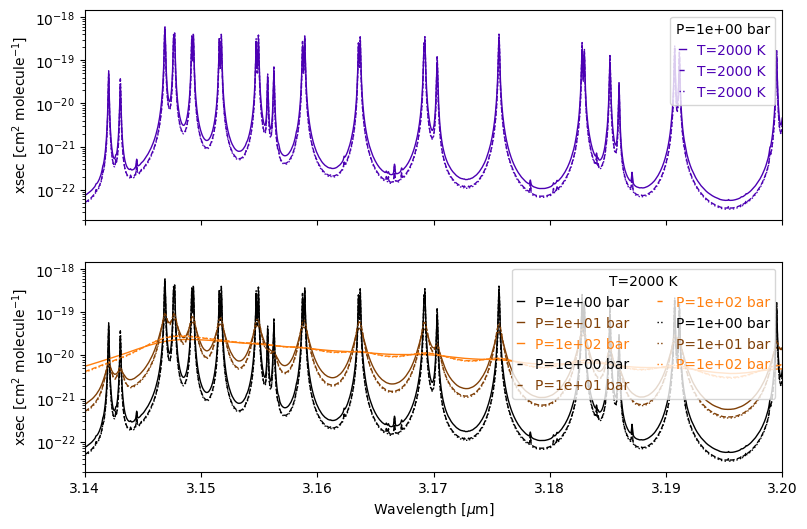

In [5]:
from matplotlib.colors import LinearSegmentedColormap as LSC
cmaps = [LSC.from_list('', ['b', 'r']), LSC.from_list('', ['k', 'C1'])]
kwargs = dict(
    return_fig_ax=True, cmaps=cmaps, lw=1, 
    xlim=(3.14,3.2), xscale='linear', ylim=(2e-23,1.5e-18), 
)
fig, ax = data_broadening_from_file.plot_combined_outputs(**kwargs)
fig, ax = data_broadening_from_constant.plot_combined_outputs(fig=fig, ax=ax, ls='--', **kwargs)
fig, ax = data_broadening_from_parameterisation.plot_combined_outputs(fig=fig, ax=ax, ls=':', **kwargs)
fig.show()

Here, we see that coefficients-file (solid) results in more pressure broadening compared to the constant (dashed) and parameterised coefficients (dotted).